In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


try:
    df = pd.read_csv('netflix_titles.csv')
    print("Dataset 'netflix_titles.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'netflix_titles.csv' not found. Please download the dataset")
    print("from https://www.kaggle.com/datasets/shivamb/netflix-shows and place it")
    print("in the same directory as this script, or provide the correct path.")
    exit() 
except Exception as e:
    print(f"An error occurred during file loading: {e}")
    exit()

print("\n--- Initial Data Overview ---")
print(df.head())
print("\n--- Dataset Information ---")
df.info()
print("\n--- Missing Values Before Cleaning ---")
print(df.isnull().sum())



Dataset 'netflix_titles.csv' loaded successfully.

--- Initial Data Overview ---
  show_id     type                  title         director                                               cast        country          date_added  release_year rating   duration                                          listed_in                                        description
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson                                                NaN  United States  September 25, 2021          2020  PG-13     90 min                                      Documentaries  As her father nears the end of his life, filmm...
1      s2  TV Show          Blood & Water              NaN  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa  September 24, 2021          2021  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries  After crossing paths at a party, a Cape Town t...
2      s3  TV Show              Ganglands  Julien Leclercq  Sami Bouajila, Tracy G

In [2]:
#Data Cleaning and Preprocessing
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')


df['country'] = df['country'].fillna(df['country'].mode()[0])


df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
# Droping rows where date_added is missing (including those coerced to NaT)
df.dropna(subset=['date_added'], inplace=True)


# Droping rows where rating is missing
df.dropna(subset=['rating'], inplace=True)

# 'duration' - spliting into numeric and unit (e.g., 'min' or 'seasons')
df['duration_numeric'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if pd.notnull(x) else np.nan)
df['duration_unit'] = df['duration'].apply(lambda x: x.split(' ')[1] if pd.notnull(x) else np.nan)


# Spliting genres into individual entries and explode for easier analysis
df['listed_in'] = df['listed_in'].apply(lambda x: [g.strip() for g in x.split(',')])

# 3. Extracting year from 'date_added' for time-based analysis
df['year_added'] = df['date_added'].dt.year

print("\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())
print("\n--- Data Types After Preprocessing ---")
df.info()
print("\n--- Cleaned Data Head ---")
print(df.head())


sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 



--- Missing Values After Cleaning ---
show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            3
listed_in           0
description         0
duration_numeric    3
duration_unit       3
year_added          0
dtype: int64

--- Data Types After Preprocessing ---
<class 'pandas.core.frame.DataFrame'>
Index: 8705 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8705 non-null   object        
 1   type              8705 non-null   object        
 2   title             8705 non-null   object        
 3   director          8705 non-null   object        
 4   cast              8705 non-null   object        
 5   country           8705 non-null   object        
 6   date_added        8705 non-null   datet

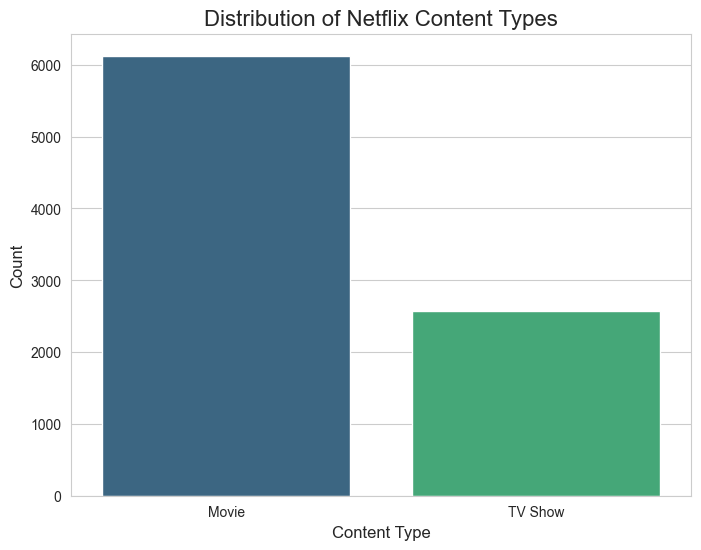

In [3]:
# 1. Distribution of Content Types (Movie vs. TV Show)
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='viridis', hue='type', legend=False)
plt.title('Distribution of Netflix Content Types', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



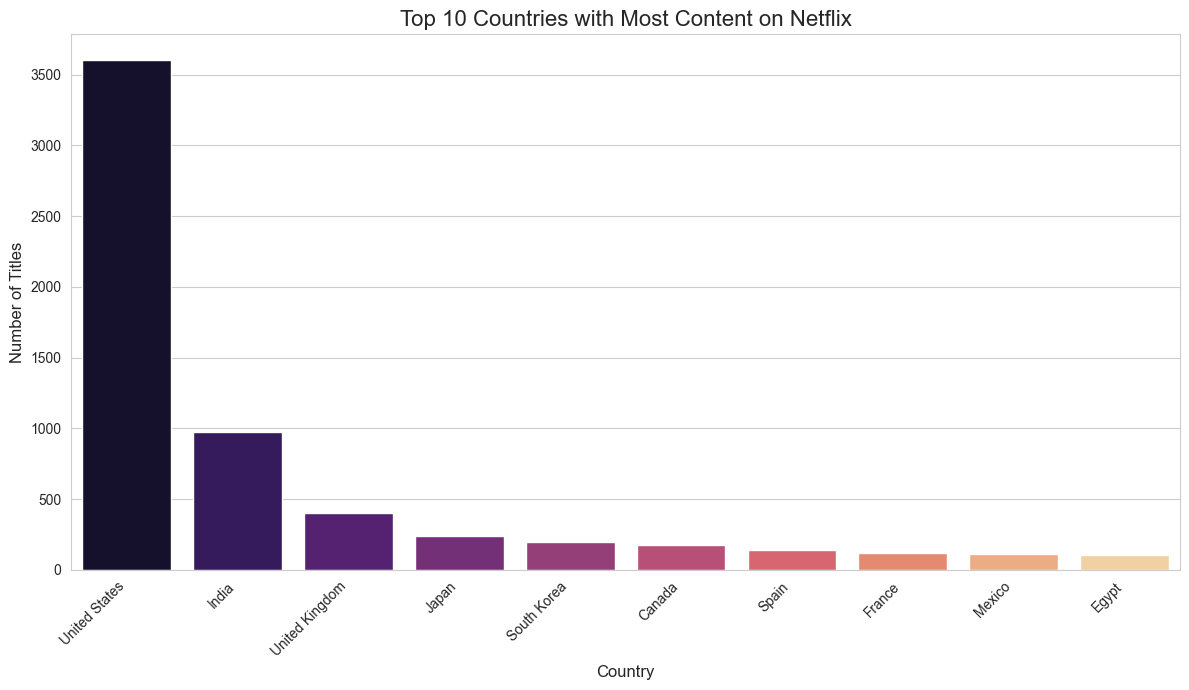

In [4]:
# 2. Top 10 Countries with Most Content
plt.figure(figsize=(12, 7))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma', hue=top_countries.index, legend=False)
plt.title('Top 10 Countries with Most Content on Netflix', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout() 
plt.show()


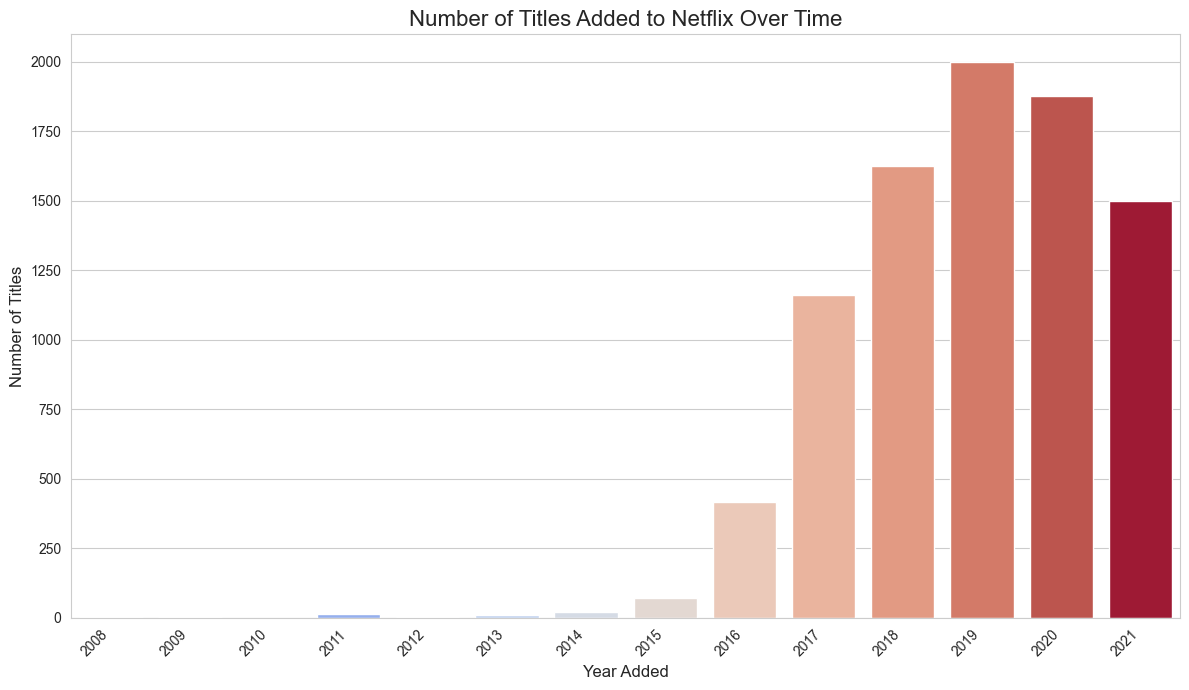

In [5]:
# 3. Content Added Over Time (by Year)
plt.figure(figsize=(12, 7))
sns.countplot(x='year_added', data=df, palette='coolwarm', order=df['year_added'].value_counts().index.sort_values(), hue='year_added', legend=False)
plt.title('Number of Titles Added to Netflix Over Time', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

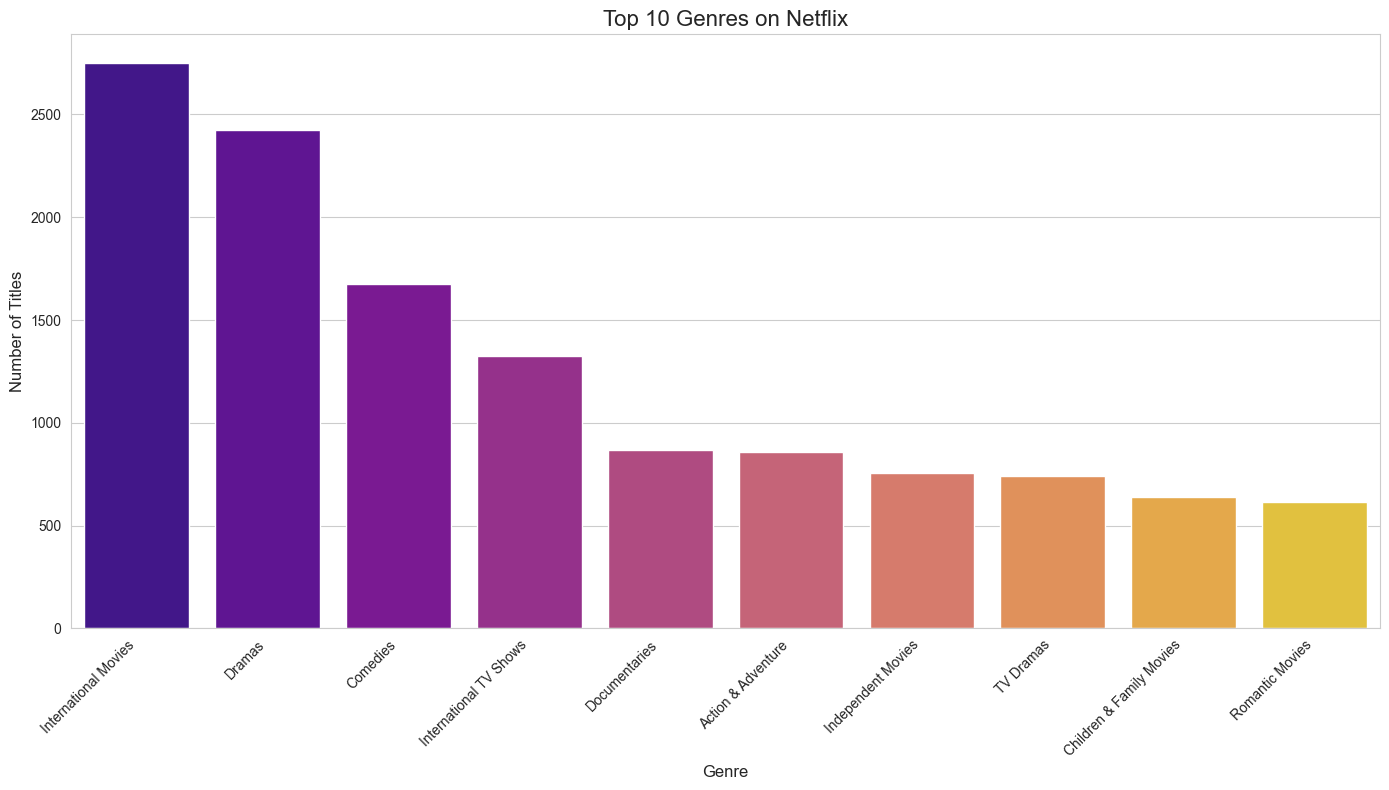

In [6]:
# 4. Top 10 Genres
genres_df = df.explode('listed_in')
plt.figure(figsize=(14, 8))
top_genres = genres_df['listed_in'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='plasma', hue=top_genres.index, legend=False)
plt.title('Top 10 Genres on Netflix', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

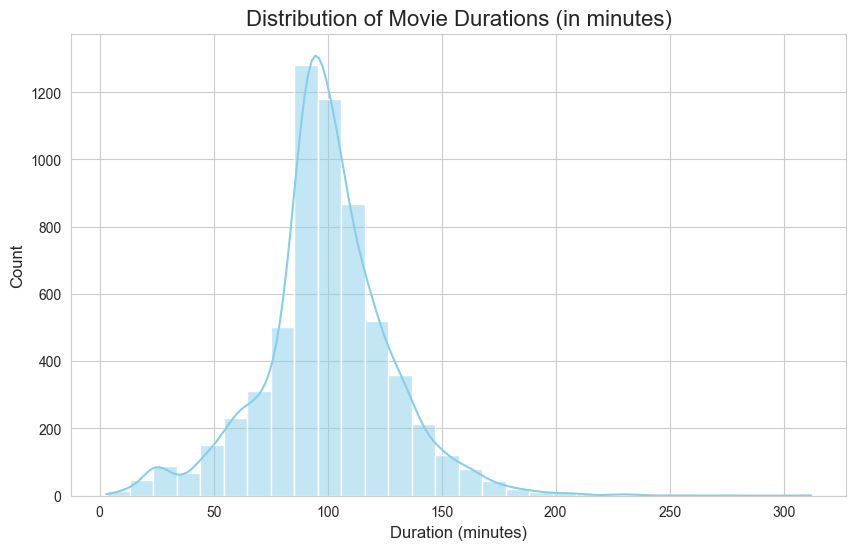

In [7]:
# 5. Distribution of Movie Durations
movies_only_df = df[df['type'] == 'Movie'].dropna(subset=['duration_numeric'])
plt.figure(figsize=(10, 6))
sns.histplot(movies_only_df['duration_numeric'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations (in minutes)', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

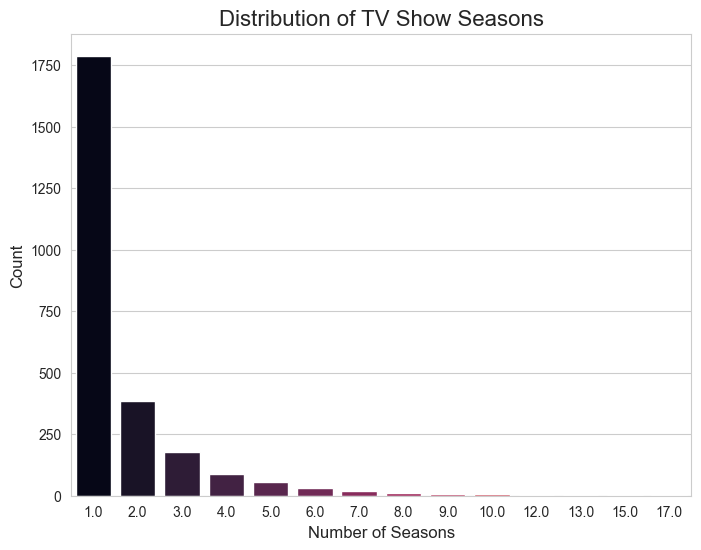

In [8]:
# 6. Distribution of TV Show Seasons
tv_shows_only_df = df[df['type'] == 'TV Show'].dropna(subset=['duration_numeric'])
plt.figure(figsize=(8, 6))
sns.countplot(x='duration_numeric', data=tv_shows_only_df, palette='rocket', order=tv_shows_only_df['duration_numeric'].value_counts().index.sort_values(), hue='duration_numeric', legend=False)
plt.title('Distribution of TV Show Seasons', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

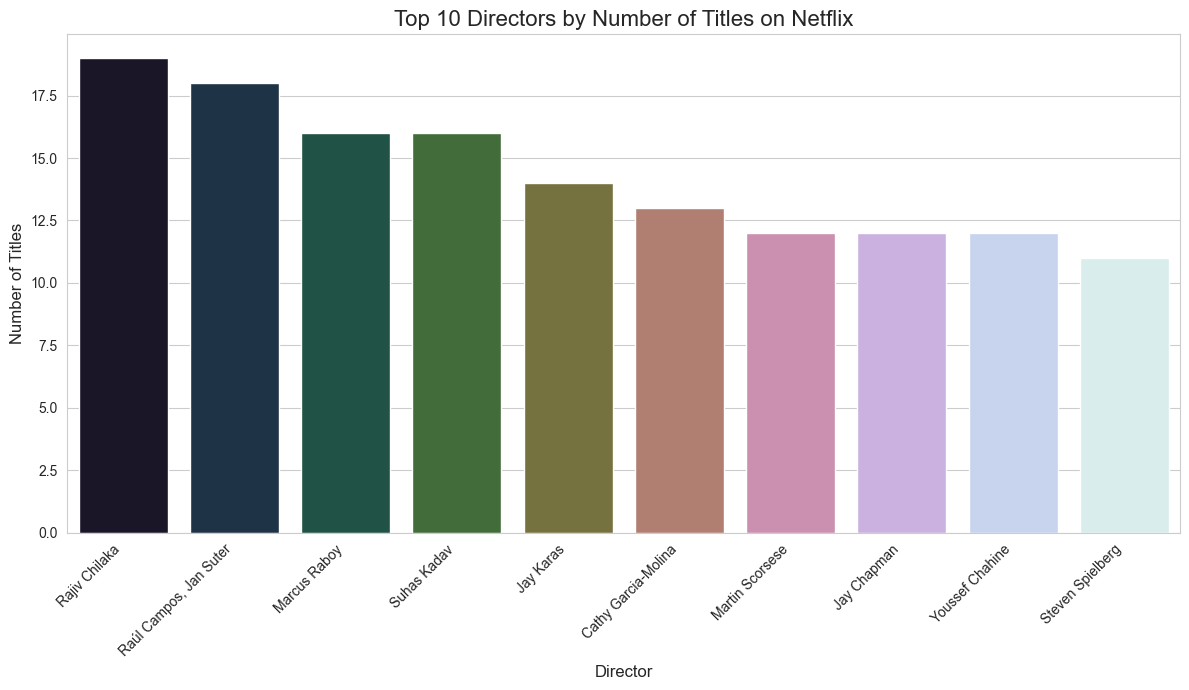

In [9]:
# 7. Top 10 Directors
plt.figure(figsize=(12, 7))
# Excluding 'unknowns'
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)
sns.barplot(x=top_directors.index, y=top_directors.values, palette='cubehelix', hue=top_directors.index, legend=False)
plt.title('Top 10 Directors by Number of Titles on Netflix', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

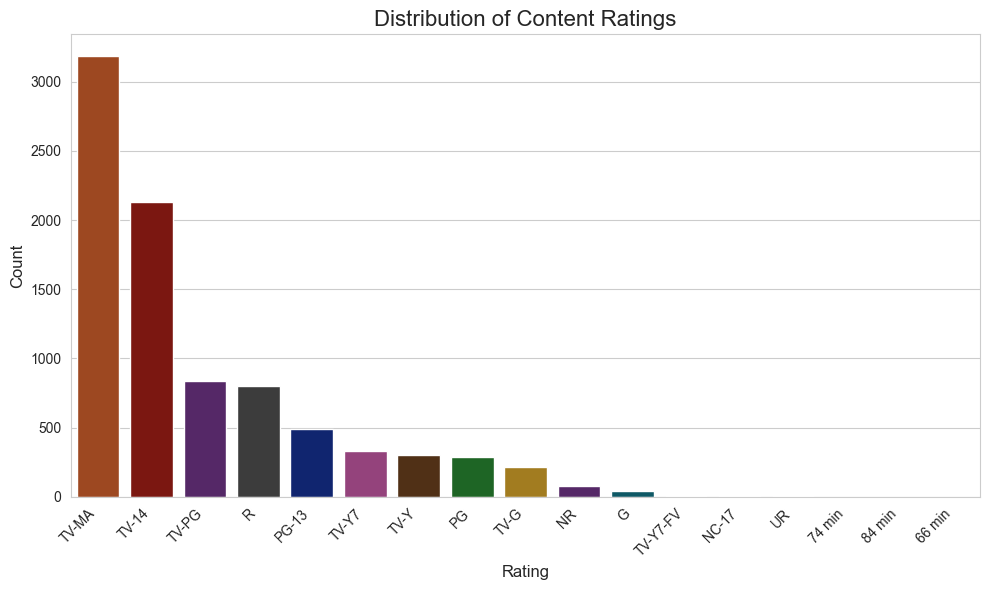


Complete Visualizations displayed.


In [10]:
# 8. Content Ratings Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='dark', order=df['rating'].value_counts().index, hue='rating', legend=False)
plt.title('Distribution of Content Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("\nComplete Visualizations displayed.")